AI Model: For WN = 0.7, WP = 165.8405 um gives VM ≈ 0.9 V (Vdd/2)
Manual (from data): WP = 156.8000 um gives VM = 0.9001 V


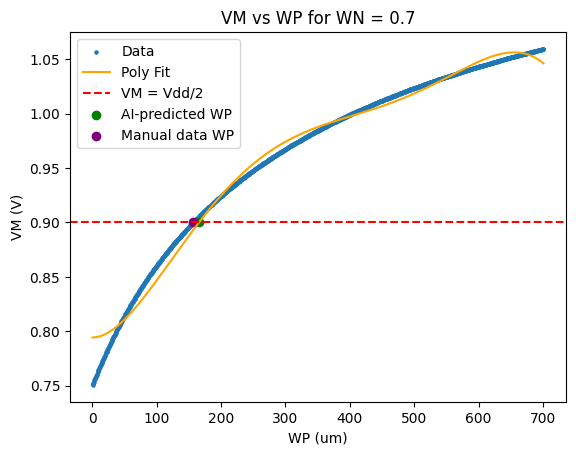

In [ ]:
# Library imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

# Loading the CSV File
df = pd.read_csv('advd_assignment_6.csv', skiprows=1)


# Fixing WN = 0.7
WN_target = 0.7
df_WN = df[np.isclose(df['WN(um)'], WN_target)]  # get all rows with given WN

# VM v/w WP plot for Regression
X = df_WN[['WP(um)']].values
y = df_WN['VM(V)'].values

# Fitting Polynomial Regression
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

# Defining a function
def predict_vm(wp):
    wp = np.array(wp).reshape(-1,1)
    Xp = poly.transform(wp)
    return model.predict(Xp)

# Root Finding - Finding WP
def objective(wp):
    return predict_vm([wp])[0] - 0.9  # predicted VM - target VM

# Root Scalar with a guess range
res = root_scalar(objective, bracket=[min(X)[0], max(X)[0]], method='brentq')
wp_pred = res.root

print(f"AI Model: For WN = {WN_target}, WP = {wp_pred:.4f} um gives VM ≈ 0.9 V (Vdd/2)")

# Closest manual WP
idx_manual = (np.abs(y - 0.9)).argmin()
wp_manual = X[idx_manual][0]
vm_manual = y[idx_manual]

print(f"Manual (from data): WP = {wp_manual:.4f} um gives VM = {vm_manual:.4f} V")

# Plotting and marking the points
plt.scatter(X, y, s=5, label='Data')
wp_range = np.linspace(min(X)[0], max(X)[0], 500)
plt.plot(wp_range, predict_vm(wp_range), label='Poly Fit', color='orange')
plt.axhline(0.9, color='red', linestyle='--', label='VM = Vdd/2')
plt.scatter([wp_pred], [0.9], color='green', label='AI-predicted WP')
plt.scatter([wp_manual], [vm_manual], color='purple', label='Manual data WP')
plt.xlabel('WP (um)')
plt.ylabel('VM (V)')
plt.legend()
plt.title(f'VM vs WP for WN = {WN_target}')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_multi = np.column_stack((df_WN['WP(um)'].values, df_WN['WN(um)'].values))
# If you want to use both WP and WN as features for a more general model:
X = df[['WP(um)', 'WN(um)']].values
y = df['VM(V)'].values

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

y_pred = model.predict(X_poly)

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

# R²
r2 = r2_score(y, y_pred)
print("R2:", r2)

# Adjusted R²
n = X_poly.shape[0]  # number of samples
p = X_poly.shape[1] - 1  # number of independent features (after poly transform, minus intercept)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2:", adj_r2)


RMSE: 0.008183934206900998
R2: 0.9896307351783334
Adjusted R2: 0.9894191175289117


In [ ]:
def predict_vmid(wp, wn):
    X_new = poly.transform(np.array([[wp, wn]]))
    return model.predict(X_new)[0]

# Example: Predict VM for WP = 165.8 um, WN = 0.7 um
print("Example VMID prediction:", predict_vmid(165.8, 0.7))


Example VMID prediction: 0.8999688655630876


In [ ]:
vmid_ai = predict_vmid(156.8, 0.7)
print(f"AI model predicts VMID for WP=156.8, WN=0.7: {vmid_ai:.4f} V (Target: 0.9 V)")


AI model predicts VMID for WP=156.8, WN=0.7: 0.8930 V (Target: 0.9 V)
